Step 1: Load and Explore the Dataset

Step 1.1: Import Required Libraries

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside the notebook
%matplotlib inline


Step 1.2: Load the Dataset

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

# Step 3: Show the first 5 rows
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


 Step 1.3: Understand the Data

In [3]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Check data types and column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Step 2: Clean and Prepare the Data

In [4]:
df.rename(columns={'Rating': 'IMDB_Rating'}, inplace=True)


In [5]:
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [6]:
df = df.dropna(subset=['IMDB_Rating', 'Genre', 'Duration', 'Director'])


In [7]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5819 non-null   object 
 1   Year         5819 non-null   float64
 2   Duration     5819 non-null   float64
 3   Genre        5819 non-null   object 
 4   IMDB_Rating  5819 non-null   float64
 5   Votes        5819 non-null   object 
 6   Director     5819 non-null   object 
 7   Actor 1      5746 non-null   object 
 8   Actor 2      5705 non-null   object 
 9   Actor 3      5659 non-null   object 
dtypes: float64(3), object(7)
memory usage: 500.1+ KB


,Name,Year,Duration,Genre,IMDB_Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Step 3: Encode the Categorical Columns (Convert text → numbers)

In [8]:
df = df.drop(['Name', 'Votes', 'Year'], axis=1)


In [9]:
# Keep only the first genre (before the comma)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())


In [10]:
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)


C:\Users\Manickaraj\AppData\Local\Temp\ipykernel_17312\789897739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Actor 1'].fillna('Unknown', inplace=True)
C:\Users\Manickaraj\AppData\Local\Temp\ipykernel_17312\789897739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [11]:
Step 3.4: Label Encode the text columns

SyntaxError: invalid syntax (4144258710.py, line 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()


,Duration,Genre,IMDB_Rating,Director,Actor 1,Actor 2,Actor 3
1,109.0,7,7.0,658,1404,2309,319
3,110.0,4,4.4,1399,1247,730,2148
5,147.0,4,4.7,1598,392,76,2045
6,142.0,7,7.4,2135,719,1128,2525
8,82.0,11,5.6,144,2005,1192,1013


Step 4: Split the Data & Train the Model

Step 4.1: Define Features and Target

In [ ]:
# Features (all except the target column)
X = df.drop('IMDB_Rating', axis=1)

# Target (what we want to predict)
y = df['IMDB_Rating']


Step 4.2: Split into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4.3: Train a Regression Model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

 Step 4.4: Predict and Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 1.3536017728209453
R² Score: 0.023083137433450363


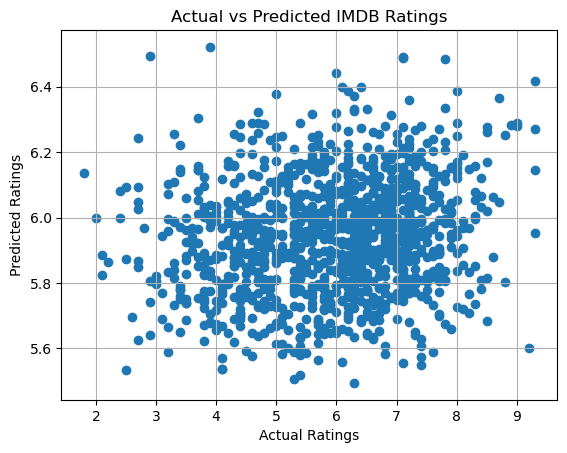

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDB Ratings")
plt.grid(True)
plt.show()


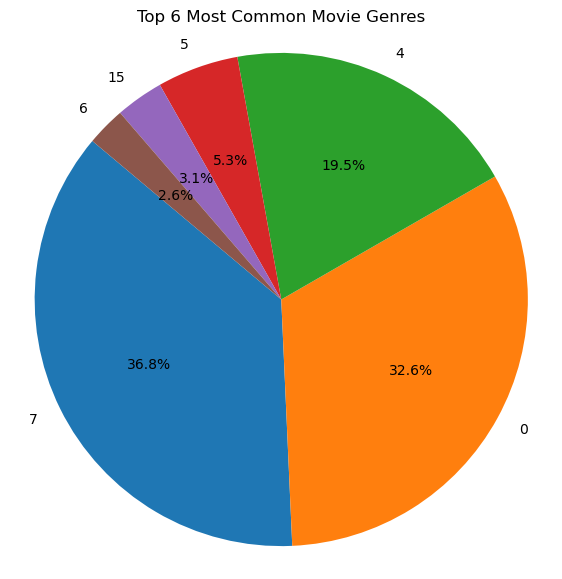

In [ ]:
# Count genres
genre_counts = df['Genre'].value_counts().head(6)  # Top 6 genres

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 6 Most Common Movie Genres")
plt.axis('equal')
plt.show()


In [ ]:
# Step: Show actual vs predicted ratings

# Import pandas just in case
import pandas as pd

# Combine actual and predicted values into one table
predictions_df = pd.DataFrame({
    'Actual Rating': y_test.values,
    'Predicted Rating': y_pred.round(2)   # round to 2 decimal places for neatness
})

# Show top 10 rows
predictions_df.head(10)


,Actual Rating,Predicted Rating
0,6.2,6.18
1,8.3,6.16
2,6.9,6.06
3,7.3,5.77
4,3.6,5.94
5,5.9,5.97
6,5.9,5.94
7,6.7,5.82
8,7.1,5.96
9,3.9,5.99
